Sample Frequency from Median gap (KHz): 0.56
Median gap (us):  1795.0

LARGE GAP ANALYSIS: 50 ms
Count of long gaps:  10
Largest gaps (ms):  55.144

SMALL GAP ANALYSIS: 20 ms
Sum of durations larger than 20 ms (ms): 571.31

File info & Dead Time
Time Length of file (ms,s): 4998.88 , 5.00
Dead time = (sum durations > 20 ms/Time length of file)
Dead time %: 11.43 



<Figure size 2500x2500 with 0 Axes>

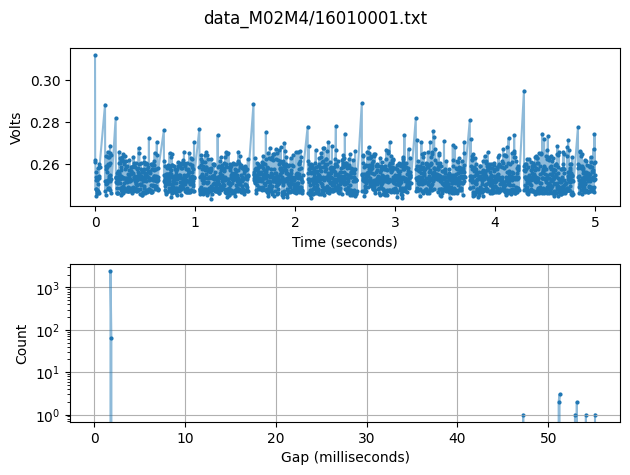

Sample Frequency from Median gap (KHz): 0.56
Median gap (us):  1795.0

LARGE GAP ANALYSIS: 50 ms
Count of long gaps:  10
Largest gaps (ms):  53.445

SMALL GAP ANALYSIS: 20 ms
Sum of durations larger than 20 ms (ms): 517.78

File info & Dead Time
Time Length of file (ms,s): 4999.21 , 5.00
Dead time = (sum durations > 20 ms/Time length of file)
Dead time %: 10.36 



<Figure size 2500x2500 with 0 Axes>

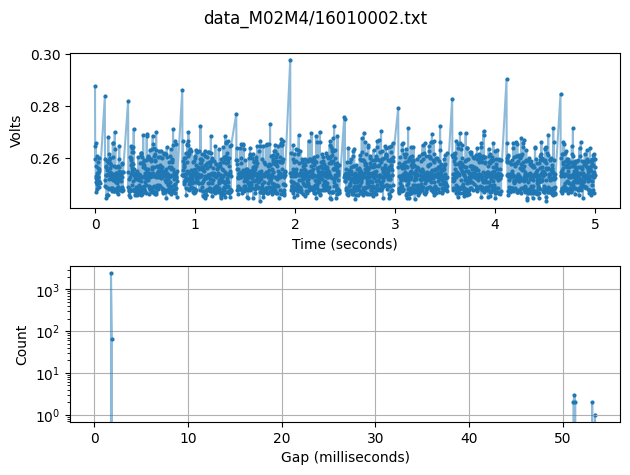

Sample Frequency from Median gap (KHz): 0.56
Median gap (us):  1795.0

LARGE GAP ANALYSIS: 50 ms
Count of long gaps:  10
Largest gaps (ms):  55.234

SMALL GAP ANALYSIS: 20 ms
Sum of durations larger than 20 ms (ms): 519.67

File info & Dead Time
Time Length of file (ms,s): 4999.41 , 5.00
Dead time = (sum durations > 20 ms/Time length of file)
Dead time %: 10.39 



<Figure size 2500x2500 with 0 Axes>

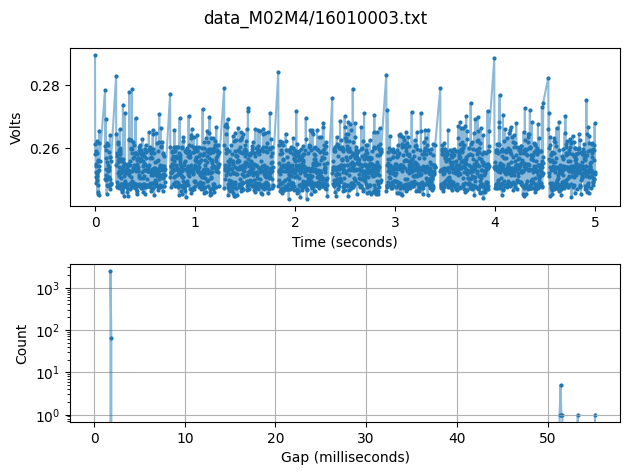

,0,1,2
Filename,16010001.txt,16010002.txt,16010003.txt
Samples_Averaged,10,10,10
Sample_Frequency_KHz,0.56,0.56,0.56
Median_Gap_us,1795.0,1795.0,1795.0
Large_Gap_Analysis_ms,50.0,50.0,50.0
Count_of_Long_Gaps,10,10,10
Largest_Gaps_ms,55.14,53.44,55.23
Small_Gap_Analysis_ms,20.0,20.0,20.0
Sum_of_Durations_Larger_than_Small_Gap_ms,571.31,517.78,519.67
Time_Length_of_File_ms,4998.88,4999.21,4999.41


In [1]:
import os
import pandas as pd
from analysis_plotter import analyze, quickLook

directory_path = 'data_M02M4/'

# Initialize an empty list to store dictionaries for each file
all_dictionaries = []

for filename in os.listdir(directory_path):
    root, extension = os.path.splitext(filename)
    if extension.lower() == ".txt":
        file_path = os.path.join(directory_path, filename)

        # Apply analyze function and get the resulting dictionary
        result_dict = analyze(file_path,prints=True)
        quickLook(file_path)

        # Add a key-value pair for the filename in the dictionary
        result_dict['Filename'] = filename
        # Move File name to 1st entry
        result_dict = {'Filename': filename, **result_dict}

        # Append the modified dictionary to the list
        all_dictionaries.append(result_dict)

# Create a DataFrame directly from the list of dictionaries
df = pd.DataFrame(all_dictionaries).transpose()
df